In [1]:
import pandas as pd
import numpy as np

## Read Displacement Files

In [3]:
dipl = pd.read_csv(r'../example_data/tweed_2487{disp}2020-06-01.csv', sep = '\t', header = None)
dipl.columns = ['timestamp','status','h','n','w']

In [4]:
dipl.index = pd.to_datetime(dipl.timestamp, unit = 's')
dipl.index.name = 'datetime'

In [5]:
dipl.head()

,timestamp,status,h,n,w
datetime,,,,,
2020-05-31 23:44:57.909312000,1.590969e+09,0,0.116218,-0.253470,0.505218
2020-05-31 23:44:58.299937024,1.590969e+09,0,-0.182535,-0.160107,0.475879
2020-05-31 23:44:58.690562048,1.590969e+09,0,-0.317135,0.012001,0.458716
2020-05-31 23:44:59.081187072,1.590969e+09,0,-0.107980,0.061181,0.285984
2020-05-31 23:44:59.471812096,1.590969e+09,0,-0.010001,-0.003000,-0.019005


## Read 1d HeaveSpectrum File (f20)

In [5]:
low = []
start = 0.025
low.append(start)
for i in range(45):
    start+=0.005
    low.append(np.round(start,3))
mid = []
start = 0.26
mid.append(start)
for i in range((78-46)):
    start+=0.01
    mid.append(np.round(start,3))
high = []
start = 0.6
high.append(start)
for i in range((100-80)):
    start+=0.02
    high.append(np.round(start,3))
    
all1dfreq = low+mid+high

In [6]:
spectrum = pd.read_csv(r'F:\wave_obs\tweed_2487\tweed_2487\2020\05\tweed_2487{0xF20}2020-05.csv', sep = '\t', header = None)

In [7]:
spectrum.columns = ['timestamp','datestamp','segments']+all1dfreq

In [8]:
spectrum.index = pd.to_datetime(spectrum.timestamp, unit = 's')
spectrum.index.name = 'datetime'

<AxesSubplot:>

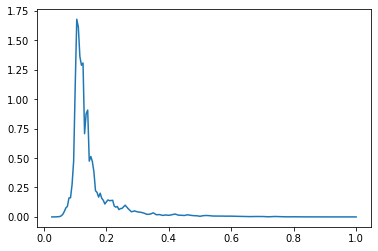

In [9]:
spectrum.iloc[0][3:].T.plot()

## Read Primary Directional Spectrum Message

In [29]:
Primdirspec = pd.read_csv(r'F:\wave_obs\tweed_2487\tweed_2487\2020\05\tweed_2487{0xF21}2020-05.csv', sep = '\t', header = None)

In [40]:
spreadNames = ['spr'+str(i) for i in range(100)]
dirNames = ['dir'+str(i) for i in range(100)]

In [31]:
dirs = []
d = 0
for i in range(100):
    dirs.append(np.round(d,2))
    d+=3.6

In [32]:
Primdirspec.columns = ['timestamp','daystamp','segments']+dirs+spreadNames

In [38]:
np.rad2deg(Primdirspec.iloc[0,3:102])

0.0       17.934066
3.6      214.769231
7.2      142.417582
10.8     159.296703
14.4     174.153846
            ...    
338.4    252.483516
342.0    248.527473
345.6    173.098901
349.2    349.802198
352.8    270.505495
Name: 0, Length: 99, dtype: float64

## Read Secondary Directional Spectrum Message

In [42]:
Secdirspec = pd.read_csv(r'F:\wave_obs\tweed_2487\tweed_2487\2020\05\tweed_2487{0xF28}2020-05.csv', sep = '\t', header = None)

In [43]:
Secdirspec

,0,1,2,3,4,5,6,7,8,9,...,293,294,295,296,297,298,299,300,301,302
0,1588289400,54554,17,-0.001954,0.319003,-0.606742,-0.692721,-0.568149,0.620909,0.443087,...,0.466987,0.563631,0.629923,0.643752,0.793715,0.646060,0.836713,1.062259,0.843915,0.772353
1,1588291200,54554,17,0.154861,0.602833,-0.447484,0.350269,-0.245725,0.308256,0.103078,...,0.413891,0.480355,0.616133,0.482587,0.643752,0.772353,0.715826,0.758161,0.846318,1.110069
2,1588293000,54554,17,0.410845,0.393258,0.713727,0.810454,0.344406,-0.234001,0.201270,...,0.433731,0.350528,0.400710,0.489288,0.579550,0.803239,0.641444,0.699459,0.914059,0.899468
3,1588294800,54554,17,-0.123596,-0.196385,0.019541,0.309722,0.605765,-0.177821,0.459209,...,0.460317,0.478124,0.411691,0.540981,0.563631,0.708805,0.659935,0.683146,0.748723,0.767618
4,1588294800,54554,17,-0.123596,-0.196385,0.019541,0.309722,0.605765,-0.177821,0.459209,...,0.460317,0.478124,0.411691,0.540981,0.563631,0.708805,0.659935,0.683146,0.748723,0.767618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,1590958800,54554,17,0.172936,0.187592,-0.330728,-0.419150,0.387885,0.257938,0.276991,...,0.536464,0.692461,0.692461,0.815169,0.980231,0.916495,1.069780,1.214705,1.494775,1.331898
1486,1590960600,54554,17,-0.054714,0.428920,0.505618,0.405960,0.369809,0.243771,-0.140694,...,0.547765,0.584108,0.727550,0.831918,0.923809,0.884918,1.097446,1.308260,1.313504,1.735317
1487,1590962400,54554,17,0.246214,0.280899,0.157792,0.005862,-0.190523,0.433317,-0.107963,...,0.568174,0.561361,0.753440,0.834315,0.914059,0.948265,1.079824,1.148116,1.292557,1.347712
1488,1590964200,54554,17,0.412311,0.230581,0.370787,0.169516,-0.079629,0.149487,0.190523,...,0.525189,0.593236,0.593236,0.706467,0.819949,0.990106,1.072289,1.132865,1.289945,1.347712


In [45]:
cosine = ['cosine_'+str(i) for i in range(100)]
sine = ['sine_'+str(i) for i in range(100)]
checkF = ['check_'+str(i) for i in range(100)]


In [48]:
Secdirspec.columns = ['timestamp','daystamp','segments']+cosine+sine+checkF

## Read Spectral Parameters File

In [51]:
SpecParams = pd.read_csv(r'F:\wave_obs\tweed_2487\tweed_2487\2020\05\tweed_2487{0xF25}2020-05.csv', sep = '\t', header = None)

In [52]:
SpecParams

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1588289400,54554,17,1.20,7.99,7.63,6.48,5.60,3.96,2.73,0.437469,9.52,1.677307,1.511340,0.503652
1,1588291200,54554,17,1.25,7.99,7.69,6.76,5.98,4.35,2.93,0.391060,8.33,1.900638,1.387057,0.450717
2,1588293000,54554,17,1.17,8.13,7.85,6.98,6.23,4.58,3.06,0.387885,8.70,1.611538,1.543562,0.467595
3,1588294800,54554,17,1.18,8.30,8.05,7.29,6.61,5.04,3.41,0.362726,8.33,1.929363,1.558905,0.528585
4,1588294800,54554,17,1.18,8.30,8.05,7.29,6.61,5.04,3.41,0.362726,8.33,1.929363,1.558905,0.528585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,1590958800,54554,17,0.86,7.42,6.71,4.70,3.69,2.41,1.84,0.546409,6.90,0.713327,1.588058,0.563108
1486,1590960600,54554,17,0.87,7.59,6.85,4.76,3.71,2.40,1.83,0.515633,6.90,0.780504,1.778318,0.599549
1487,1590962400,54554,17,0.86,7.42,6.66,4.56,3.55,2.32,1.79,0.469956,7.14,0.962893,1.609539,0.494446
1488,1590964200,54554,17,0.86,7.44,6.59,4.30,3.34,2.21,1.76,0.666585,6.90,0.525808,1.735356,0.640593


In [54]:
SpecParams = ['timestamp','daystamp','segments','Hs','Ti','Te','T1','Tz','T3','Tc','Tp','Tp','Smax','dirP(rad)','dirP_spread(rad)']

In [56]:
SpecParams

['timestamp',
 'daystamp',
 'segments',
 'Hs',
 'Ti',
 'Te',
 'T1',
 'Tz',
 'T3',
 'Tc',
 'Tp',
 'Tp',
 'Smax',
 'dirP(rad)',
 'dirP_spread(rad)']